In [1]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.9.0 False
2.14.0
not available
clang 12.0.5


In [15]:
import os 
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv

In [14]:
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth \
      -O checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth

mkdir: checkpoints: File exists
--2021-07-03 09:26:48--  https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
Resolving download.openmmlab.com... 47.75.20.25
Connecting to download.openmmlab.com|47.75.20.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177867103 (170M) [application/octet-stream]
Saving to: 'checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'

checkpoints/mask_rc 100%[===================>] 169.63M  10.1MB/s    in 18s     

2021-07-03 09:27:07 (9.34 MB/s) - 'checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth' saved [177867103/177867103]



In [16]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# Choose to use a config and initialize the detector
config = 'configs/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco.py'
# Setup a checkpoint file to load
checkpoint = 'checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'
# initialize the detector
model = init_detector(config, checkpoint, device='cpu')

/Users/hainguyen/Documents/deep_learning_projects/open-mmlab/mmdetection/mmdet/core/anchor/builder.py:16: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '
Use load_from_local loader


In [56]:
# Use the detector to do inference
frame_folder = '/content/drive/Shareddrives/Giang/HaiNguyen/UET_AI_Lab/frame_data/'
img_id = 100

# img_path = os.path.join(frame_folder, 'frame_{}.jpg'.format(img_id)) 
img_path = '../data/vehicles.jpeg'
result = inference_detector(model, img_path)

/Users/hainguyen/Documents/deep_learning_projects/open-mmlab/mmdetection/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/Users/hainguyen/Documents/deep_learning_projects/open-mmlab/mmdetection/mmdet/core/anchor/anchor_generator.py:360: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


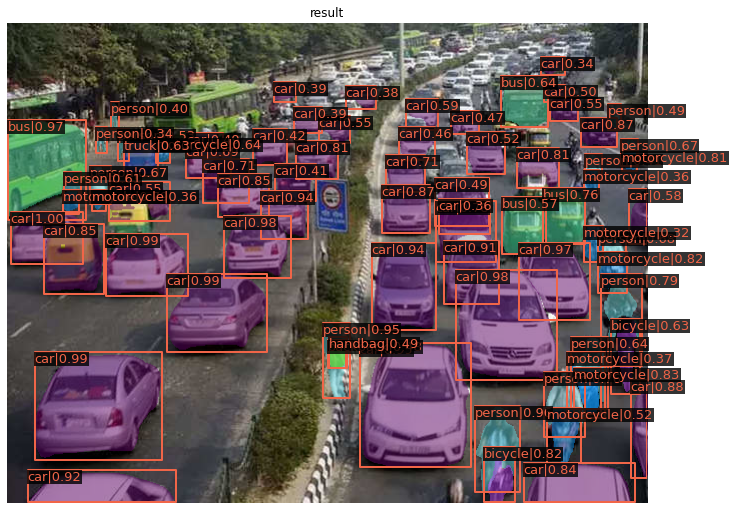

In [57]:
show_result_pyplot(model, img_path, result)

In [75]:
result[0][1][0]
bbox = result[0][1][0][:4]
bbox

array([476.8588 , 424.26556, 507.04184, 479.33087], dtype=float32)

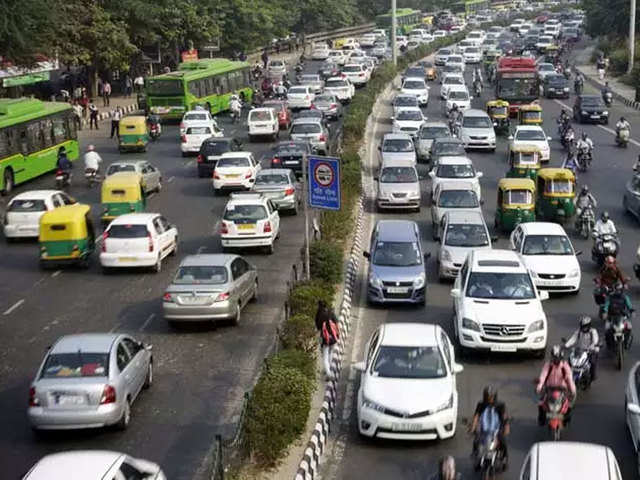

In [76]:
Image.open(img_path)

In [103]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

img = cv2.imread(img_path)

img.shape

# result[0]

(480, 640, 3)

In [91]:
obj = result[0][0][0]
bbox = obj[:4]
bbox

array([467.2832   , 383.89725  , 512.5495   , 469.75278  ,   0.9631502],
      dtype=float32)

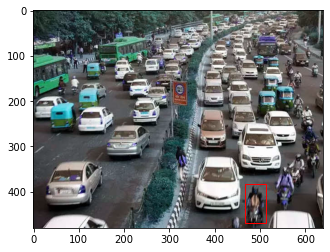

In [90]:
def visualize_item(img, bbox):

    fig, ax = plt.subplots()

    ax.imshow(img)
    
    # plt.scatter(anns[0]['keypoints'][1], anns[0]['keypoints'][0])

    # for ann in anns:
    #     # the segmentation are in format (x1, y1, x2, y2) (top left and bottom right points) 
    #     # (after convert from coco format to box format)
    #     # coco format (top left x, top left y, width, height)
    #     x1 = ann['segmentation'][0]
    #     y1 = ann['segmentation'][1]
    #     x2 = ann['segmentation'][2]
    #     y2 = ann['segmentation'][3]
    #     rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
    #     ax.add_patch(rect)

    x1 = bbox[0]
    y1 = bbox[1]
    x2 = bbox[2]
    y2 = bbox[3]

    # h, w of bbox
    # bbox.append(y2 - y1)
    # bbox.append(x2 - x1)
    rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    
    plt.show()

visualize_item(img, bbox)

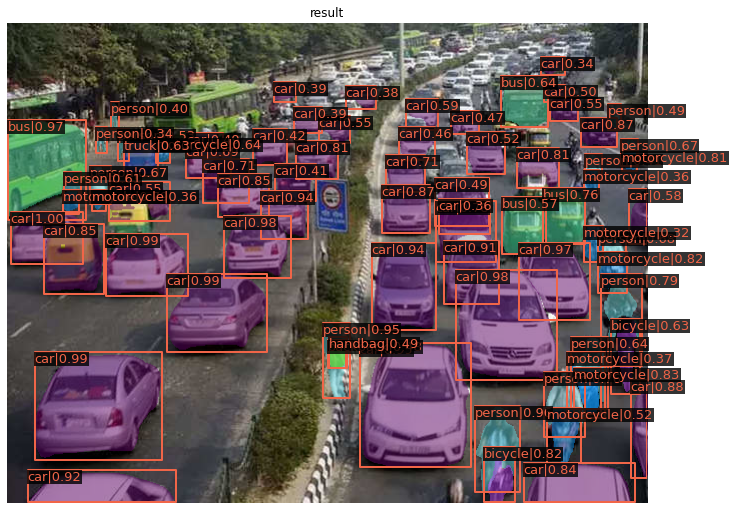

In [98]:
show_result_pyplot(model, img, result)


In [109]:
import pycocotools
person_result = result[0][0]


for obj in person_result:


array([[4.67283203e+02, 3.83897247e+02, 5.12549500e+02, 4.69752777e+02,
        9.63150203e-01],
       [3.15495117e+02, 3.00329681e+02, 3.42706207e+02, 3.75305939e+02,
        9.54693258e-01],
       [5.93432251e+02, 2.51005676e+02, 6.34872986e+02, 3.43129425e+02,
        7.91838408e-01],
       [5.36589478e+02, 3.49283539e+02, 5.77249023e+02, 4.14845398e+02,
        7.63860404e-01],
       [5.90977295e+02, 2.09902832e+02, 6.18634521e+02, 2.41687225e+02,
        6.77420497e-01],
       [6.13841919e+02, 1.16456856e+02, 6.30880493e+02, 1.43411209e+02,
        6.71871424e-01],
       [8.25553589e+01, 1.43608063e+02, 1.03067764e+02, 1.81433243e+02,
        6.71073675e-01],
       [5.63176697e+02, 3.14417633e+02, 6.00641663e+02, 3.86133453e+02,
        6.44881189e-01],
       [5.66720695e+01, 1.49996384e+02, 7.35127106e+01, 1.77128815e+02,
        6.08712137e-01],
       [1.10650749e+02, 1.06279129e+02, 1.21752716e+02, 1.38871719e+02,
        5.28358161e-01],
       [6.00938599e+02, 8.1989